# Exercise 10 - Tests

### Tone Alsvik Finstad

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
import pandas as pd

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [7]:
expectation=6.3
sigma=np.sqrt(expectation)

#Want to find the probability of 15 or more hurricanes are observed
Z_val=(15-expectation)/sigma
print(f"Z-value: {Z_val}")

Z-value: 3.4661629670697414


As this is bigger than 3, this means that the number of hurricaes in 2005 was significantly different than the historic average.

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [9]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma_pre=np.sqrt(np.var(pre, ddof=1))
sigma_post=np.sqrt(np.var(post, ddof=1))
var=np.sqrt((sigma_pre**2+sigma_post**2)/2)
T=(np.mean(pre)-np.mean(post))/(var*np.sqrt(2/len(pre)))
print(f"T = {T}")
pvalue = stats.t.cdf(T, len(pre) - 1) + (1. - stats.t.cdf(-T, len(pre) - 1))
print(f"p-value = {pvalue}")

T = -3.786997938137629
p-value = 0.004302464132864604


The change in blood pressure within our sample is statistically significant, as the p-value is smaller than 0.05. 

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

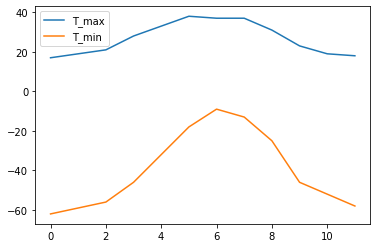

In [10]:
T_max=[17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
T_min=[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
plt.plot(T_max, label="T_max")
plt.plot(T_min, label="T_min")
plt.legend()
plt.show()

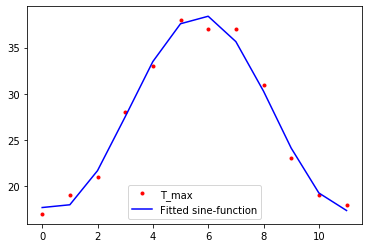

Amplitude: 10.581699529314136
Period: 0.5922742387511362
Offset: 4.464529537463421
Constant: 27.949635362519558


In [30]:
# will try to fit with a sine-function

def sinus(x, amplitude, period, offset, const):
    return amplitude*np.sin(period*x + offset) + const

x=np.arange(0,12,1)
popt, pcov = curve_fit(sinus, x, T_max)
plt.plot(x, T_max, "r.",label="T_max")
plt.plot(x, sinus(x, *popt),"b-", label="Fitted sine-function")
plt.legend()
plt.show()
print(f"Amplitude: {popt[0]}")
print(f"Period: {popt[1]}")
print(f"Offset: {popt[2]}")
print(f"Constant: {popt[3]}")

Doing the same for minimum values, using the parameters from the maximum temperatures as initial guess, as the curves have similar shapes.

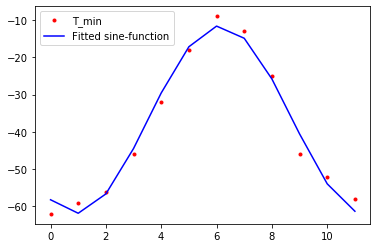

Amplitude: 25.149619581024627
Period: 0.6013210293333707
Offset: 4.166083092948669
Constant: -36.71256174840298


In [31]:
popt2, pcov2 = curve_fit(sinus, x, T_min, p0=[10.58169953,0.59227424,4.46452954,27.94963536])
plt.plot(x, T_min, "r.",label="T_min")
plt.plot(x, sinus(x, *popt2),"b-", label="Fitted sine-function")
plt.legend()
plt.show()
print(f"Amplitude: {popt2[0]}")
print(f"Period: {popt2[1]}")
print(f"Offset: {popt2[2]}")
print(f"Constant: {popt2[3]}")

The fit seems reasonable for both the maximum and minimun temperatures. The offset is a little higher for the maximum-temperatures than minimum temperature, which means that the maximum temperatures has their maximum a little bit earlier in the year than the minimum, but they are very similar. 

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [36]:
import pickle
filename = "residuals_261new.pkl"
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
infile.close()


In [37]:
residuals=new_dict.item()["residuals"]
print(len(residuals))

11131


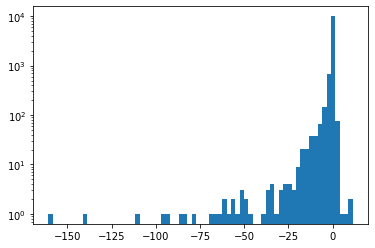

In [42]:
plt.figure()
plt.hist(residuals, bins=70)
plt.yscale("log")
plt.show()

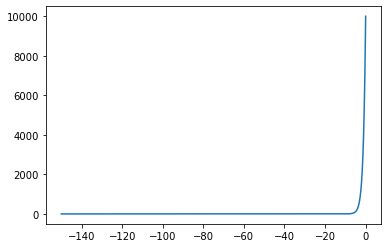

a: -0.2813663754210191
b: 5.129021151121808
c: -0.6160992352870673


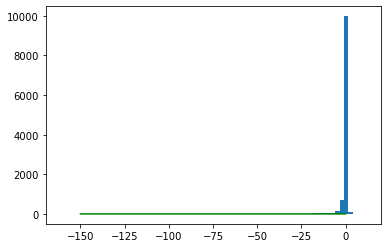

In [65]:
def exponential(x, a, b, c):
    return (a*np.exp(b*x)+c)

x=np.linspace(-150,0,len(residuals))
exp=exponential(x,10000,0.9,1)
plt.plot(x,exp)
plt.show()

popt, pcov = curve_fit(exponential, x, residuals, p0=[10000,0.9,1])
print(f"a: {popt[0]}")
print(f"b: {popt[1]}")
print(f"c: {popt[2]}")
plt.plot(x, exponential(x, *popt), "g-")
plt.hist(residuals,70)
plt.show()

The curve-fit function does not find a good approxiamtion, I think the numbers for a, b and c that I set as initial guess p0=[10000,0.9,1] is a lot better than the ones found in the curve-fit function, but I am not sure why the function fails here. 

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

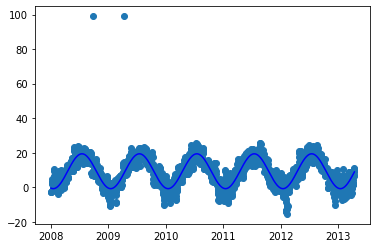

a: -10.093509486831035
b: 18.591251837060273
c: 9.261525275224558


In [73]:
df = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep = ' ' ,header = 0,names= ['y', 't'])
df

def f(t, a, b, c):
    return (a*np.cos(2*np.pi*t + b) + c)
all_yrs=np.array(df["y"])
all_tmp=np.array(df["t"])
yrs=all_yrs[all_yrs>2008]
tmp=all_tmp[all_yrs>2008]

popt_f, pcov_f = curve_fit(f, yrs, tmp)
plt.scatter(yrs,tmp)
plt.plot(yrs, f(yrs,*popt_f),"b")
plt.show()
print(f"a: {popt_f[0]}")
print(f"b: {popt_f[1]}")
print(f"c: {popt_f[2]}")

The average daily temperature is c.
The average minimum temperature is c+a.
The average maximum temperature is c-a.

b is the phase-shift. 

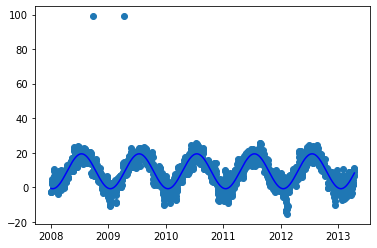

a: -10.097594027020904
b: 0.9962944120590208
c: 65.40611570172013
d: 9.243246242214017


In [76]:
def g(t, a, b, c, d):
    return (a*np.cos(2*np.pi*b*t + c) + d)

popt_g, pcov_g = curve_fit(g, yrs, tmp)
plt.scatter(yrs,tmp)
plt.plot(yrs, g(yrs,*popt_g),"b")
plt.show()
print(f"a: {popt_g[0]}")
print(f"b: {popt_g[1]}")
print(f"c: {popt_g[2]}")
print(f"d: {popt_g[3]}")

In [80]:
res_f = tmp - f(yrs, *popt_f)
ssr_f = np.sum(res_f**2)


res_g = tmp - g(yrs, *popt_g)
ssr_g = np.sum(res_g**2)

print(f'RSS of f(x): {ssr_f}')
print(f'RSS of g(x): {ssr_g}')

RSS of f(x): 42527.75965166897
RSS of g(x): 42410.172541499865


In [84]:
# I use the Ftest from lecture
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval
alpha = 0.05
n_1=3
n_2=4
N = n_1 + n_2

Ftest(ssr_f, ssr_g, n_1, n_2, N, verbose = True)

p-value: 0.933 , additional parameter necessary: NO


0.9330803806641199